In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import scipy

In [2]:
#clist = sns.color_palette('Paired')
#clist = clist[:2] + clist[6:8]
clist = sns.color_palette('colorblind')[:2]
clist

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549)]

In [3]:
res, sigma, edge = 35, 0, 0.0
run_ID = f'{res}-{sigma}-{edge}'
fname = f'data/rmaps/{run_ID}/speccorr.npz'
print(f'Loaded {fname} --- Last modified at {time.ctime(os.stat(fname).st_mtime)}')
speccorr = np.load(fname)

fname = f'data/rmaps/{run_ID}/fpspeccorr.npz'
print(f'Loaded {fname} --- Last modified at {time.ctime(os.stat(fname).st_mtime)}')
fpspeccorr = np.load(fname)

fname = f'data/rmaps/{run_ID}/speccorr_new.npz'
print(f'Loaded {fname} --- Last modified at {time.ctime(os.stat(fname).st_mtime)}')
speccorr_new = np.load(fname)

fname = f'data/rmaps/{run_ID}/fpspeccorr_new.npz'
print(f'Loaded {fname} --- Last modified at {time.ctime(os.stat(fname).st_mtime)}')
fpspeccorr_new = np.load(fname)


fname = f'data/rmaps/{run_ID}/fpautocorr.npz'
print(f'Loaded {fname} --- Last modified at {time.ctime(os.stat(fname).st_mtime)}')
fpautocorr = np.load(fname)

fname = f'data/rmaps/{run_ID}/rmaps.npz'
print(f'Loaded {fname} --- Last modified at {time.ctime(os.stat(fname).st_mtime)}')
rmaps = np.load(fname)

Loaded data/rmaps/35-0-0.0/speccorr.npz --- Last modified at Thu May 23 11:46:01 2024
Loaded data/rmaps/35-0-0.0/fpspeccorr.npz --- Last modified at Thu May 23 11:46:01 2024
Loaded data/rmaps/35-0-0.0/speccorr_new.npz --- Last modified at Thu May 23 11:46:01 2024
Loaded data/rmaps/35-0-0.0/fpspeccorr_new.npz --- Last modified at Thu May 23 11:46:01 2024
Loaded data/rmaps/35-0-0.0/fpautocorr.npz --- Last modified at Thu May 23 11:46:01 2024
Loaded data/rmaps/35-0-0.0/rmaps.npz --- Last modified at Thu May 23 11:46:00 2024


[230 228 888 870 776 901 771 830]
[ 22 922 302  16 571  33  23 908]
[599 596 922 458 859 579 230 670]
[ 379  511  585  519  842 1040  524  694]
[ 54 765 743 957 776 766 901 759]
[ 850   81   77  964   30 1223  757   71]
[906 873 878 907 270 145  22 856]
[ 112  888  877 1036  366  622 1146  573]
[771 757 776 780 751 230 793 864]
[  22   63  636   23   73  571    5 1046]
[230 820 228 225 532 248 259 166]
[1068  571  999  990  888  572  922  884]
[763 767 765 764 766 756 743 776]
[ 850  844   77   72  228 1287  846  853]
[596 878  50 968 456 873 727 188]
[ 577  705 1031 1019 1025  581 1072 1235]
[741 764 766 756 743 803 213 759]
[175 179 181 188 925  81  77  22]
[132 104   2 849 194  89 924 113]
[ 607  445  605  323 1252  797  583  688]


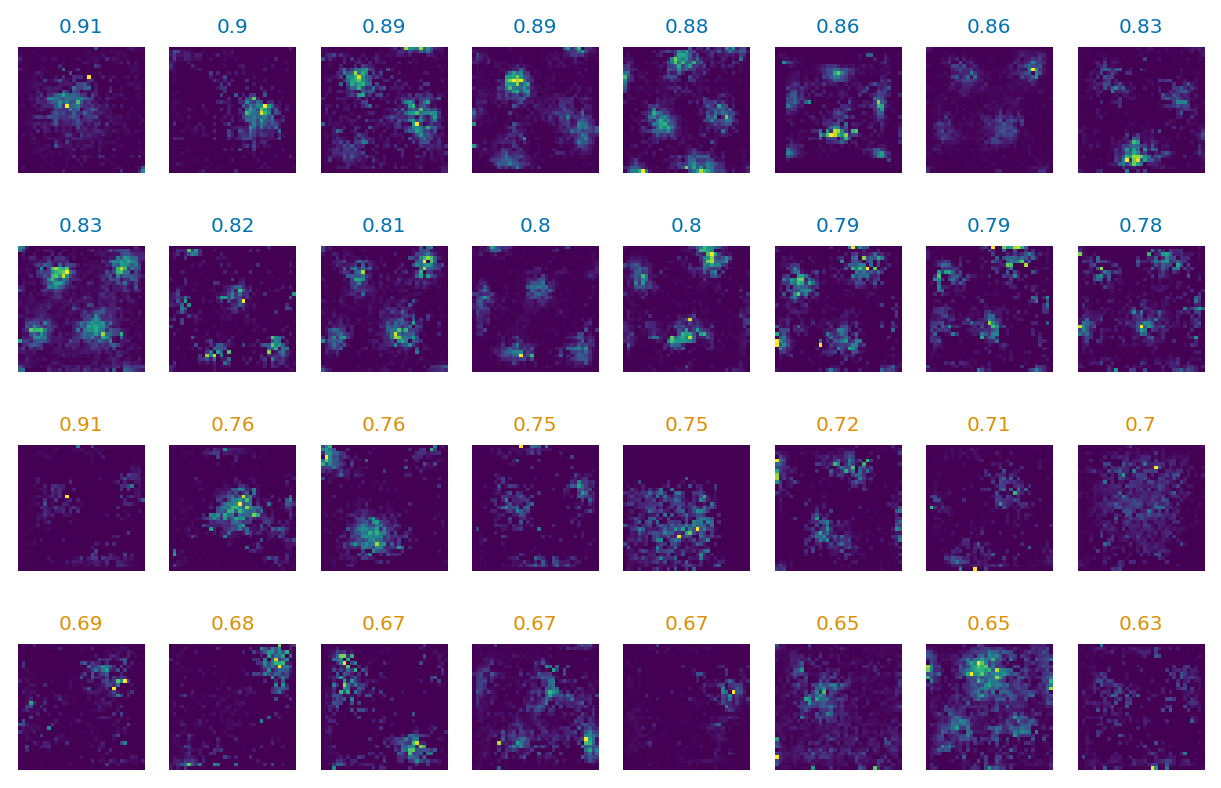

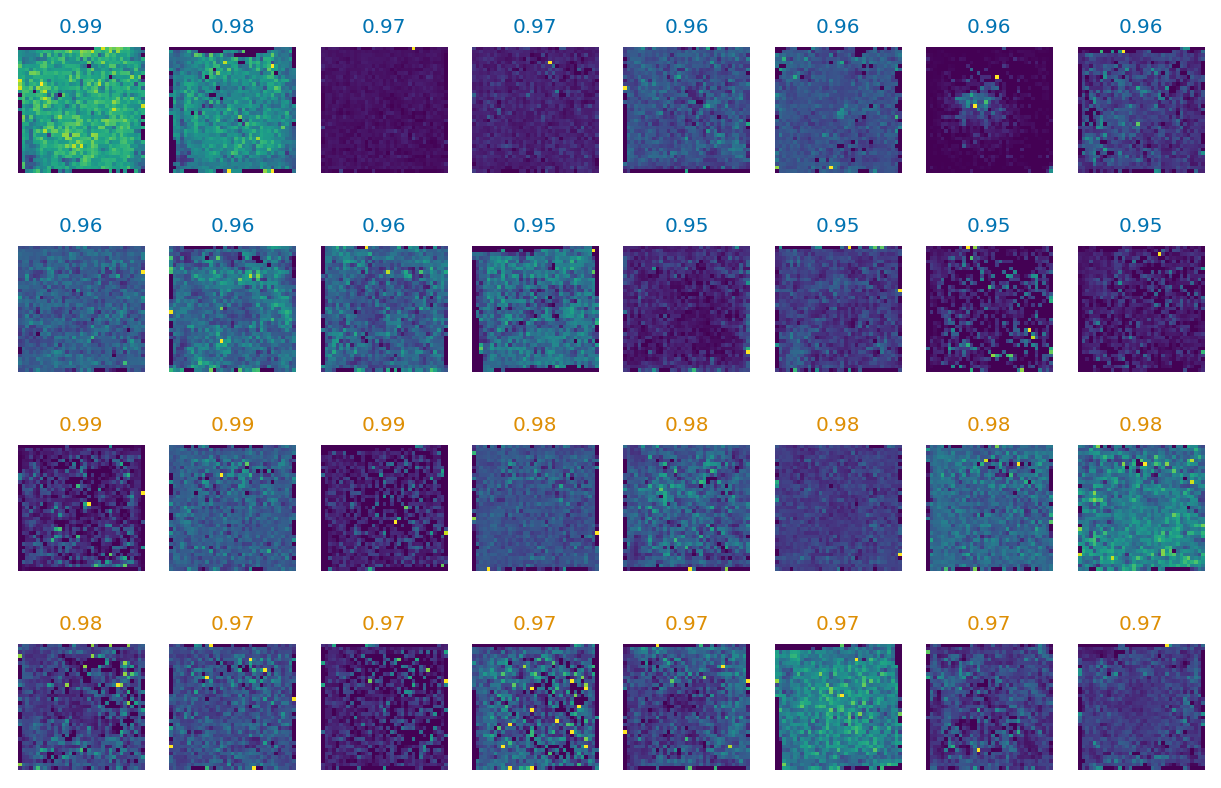

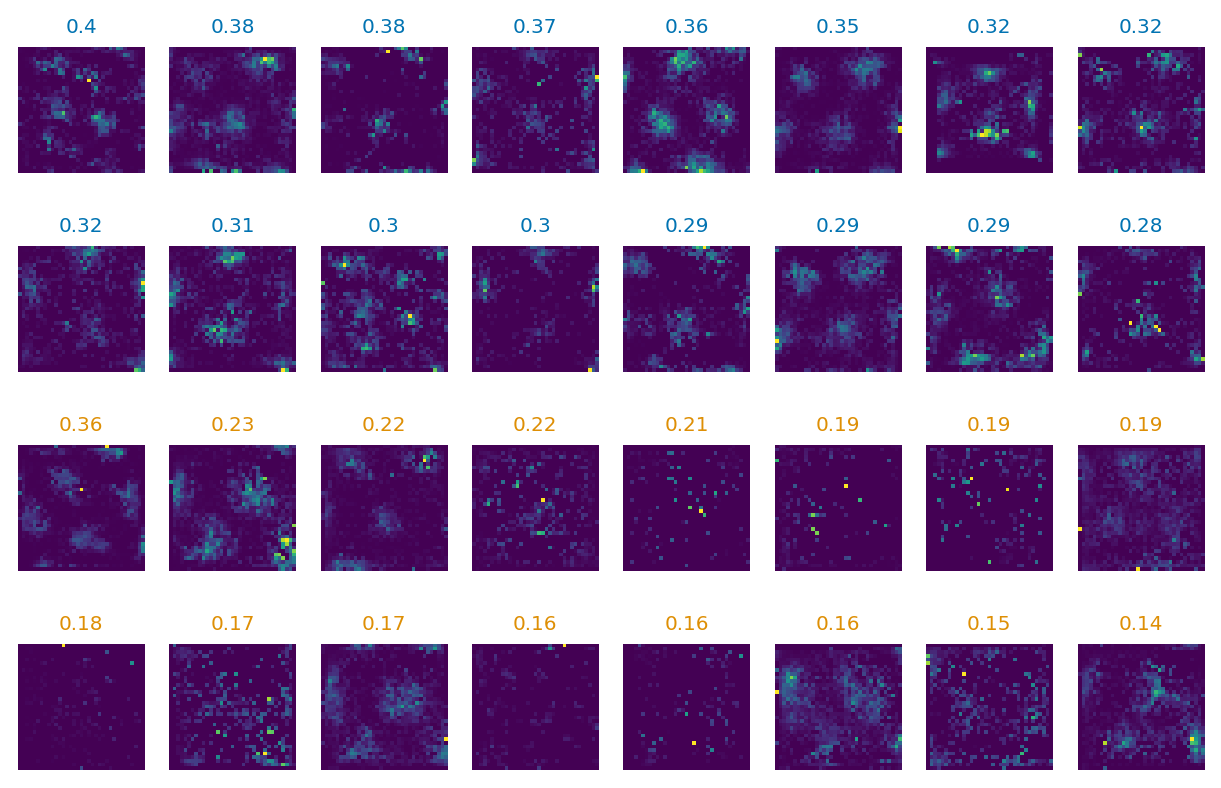

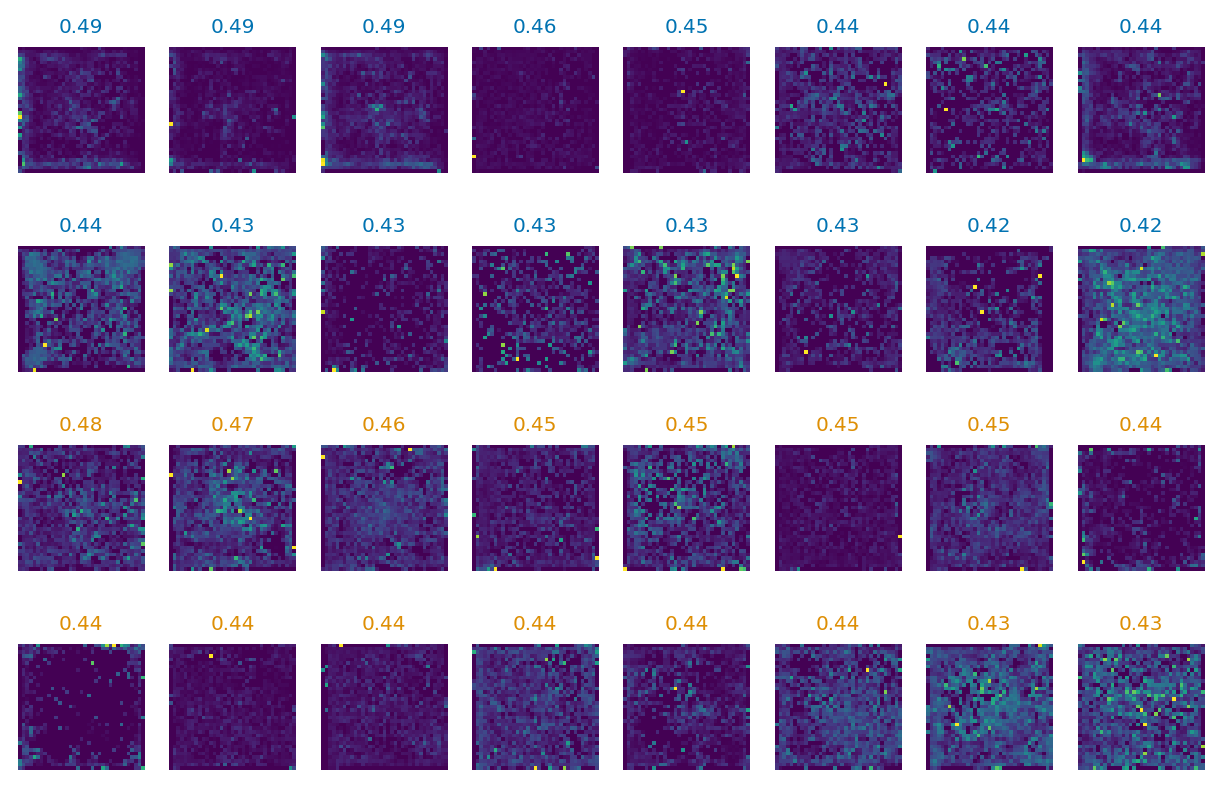

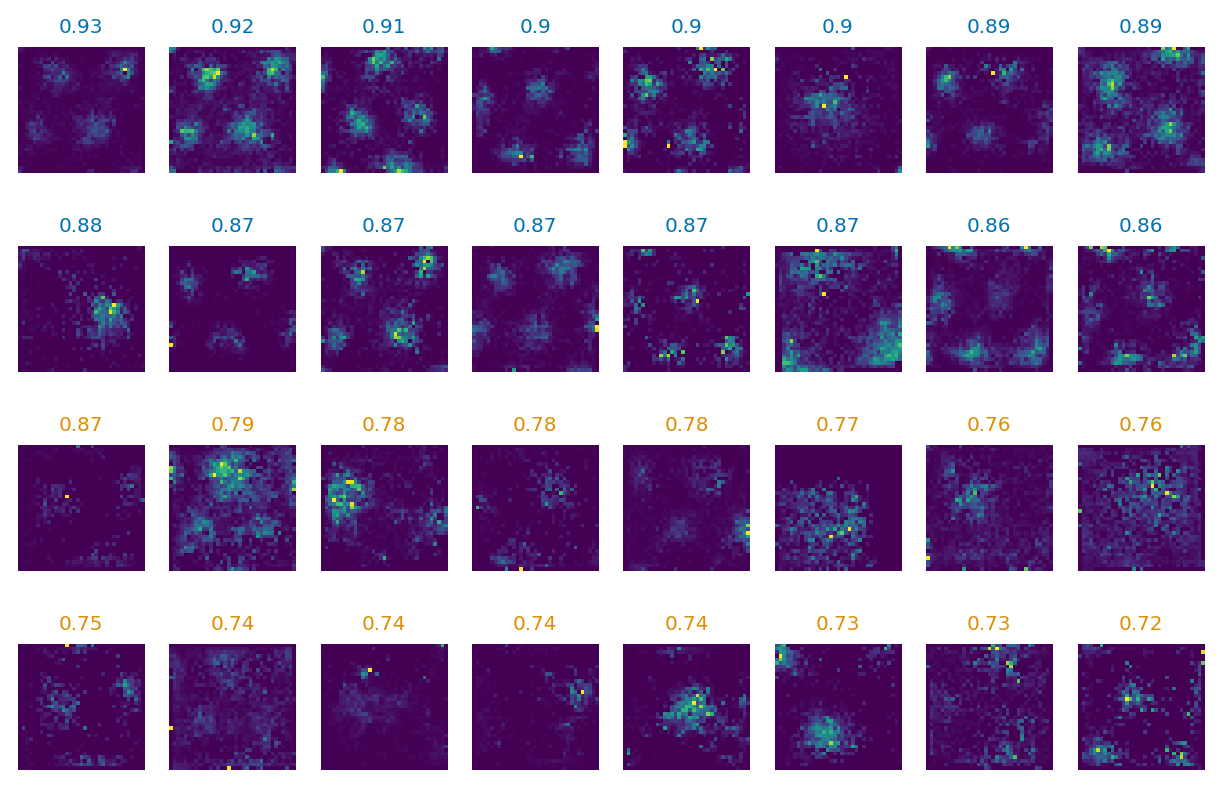

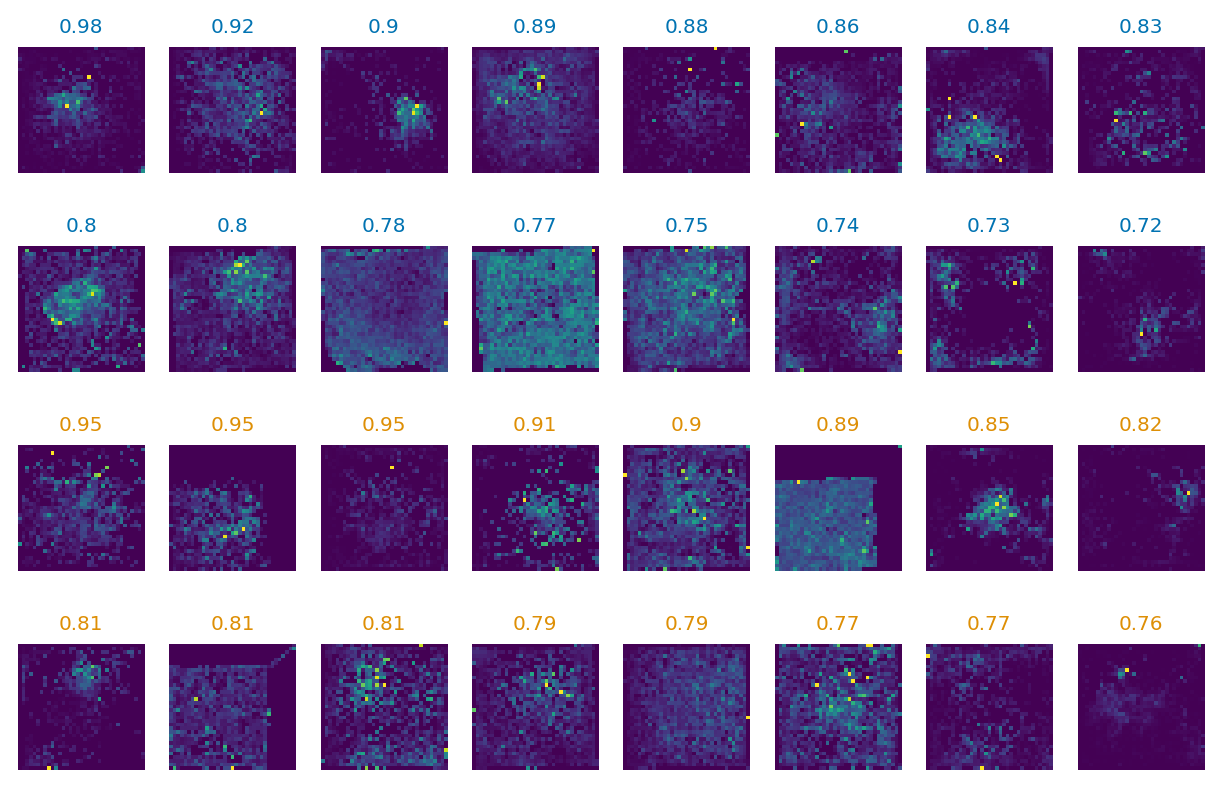

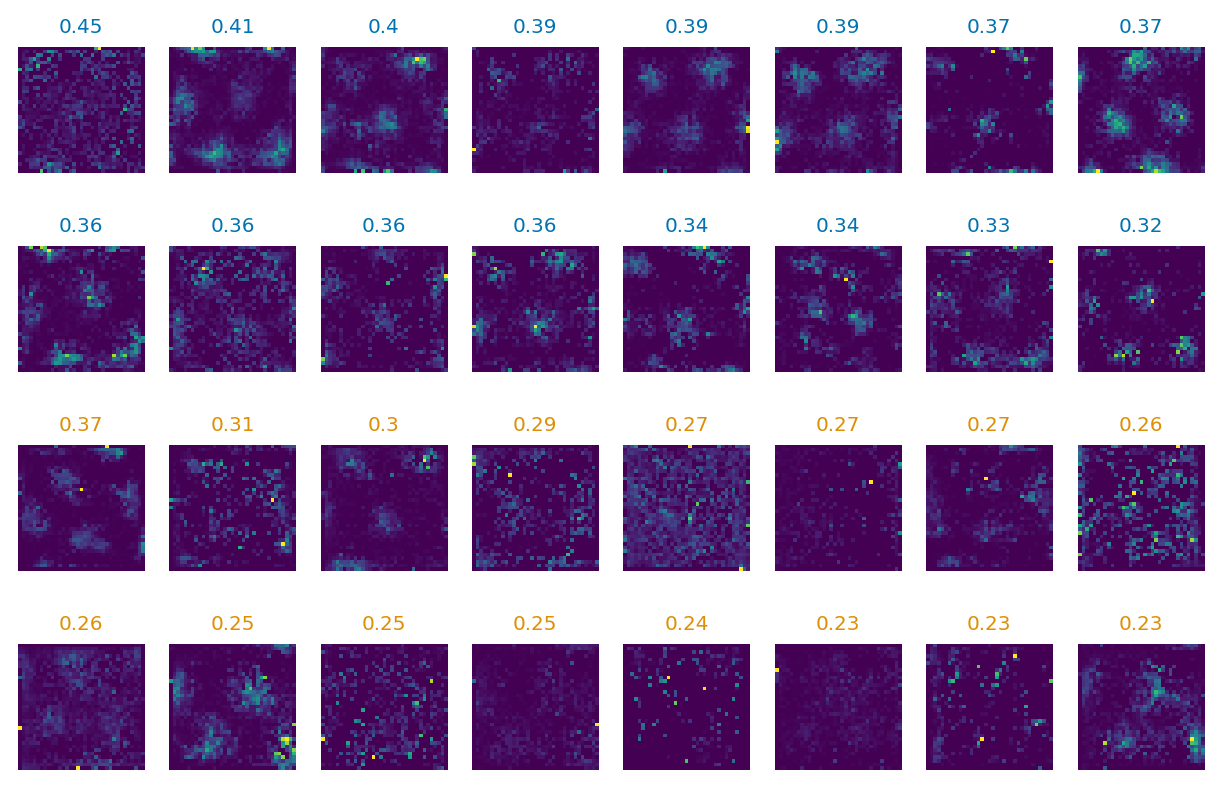

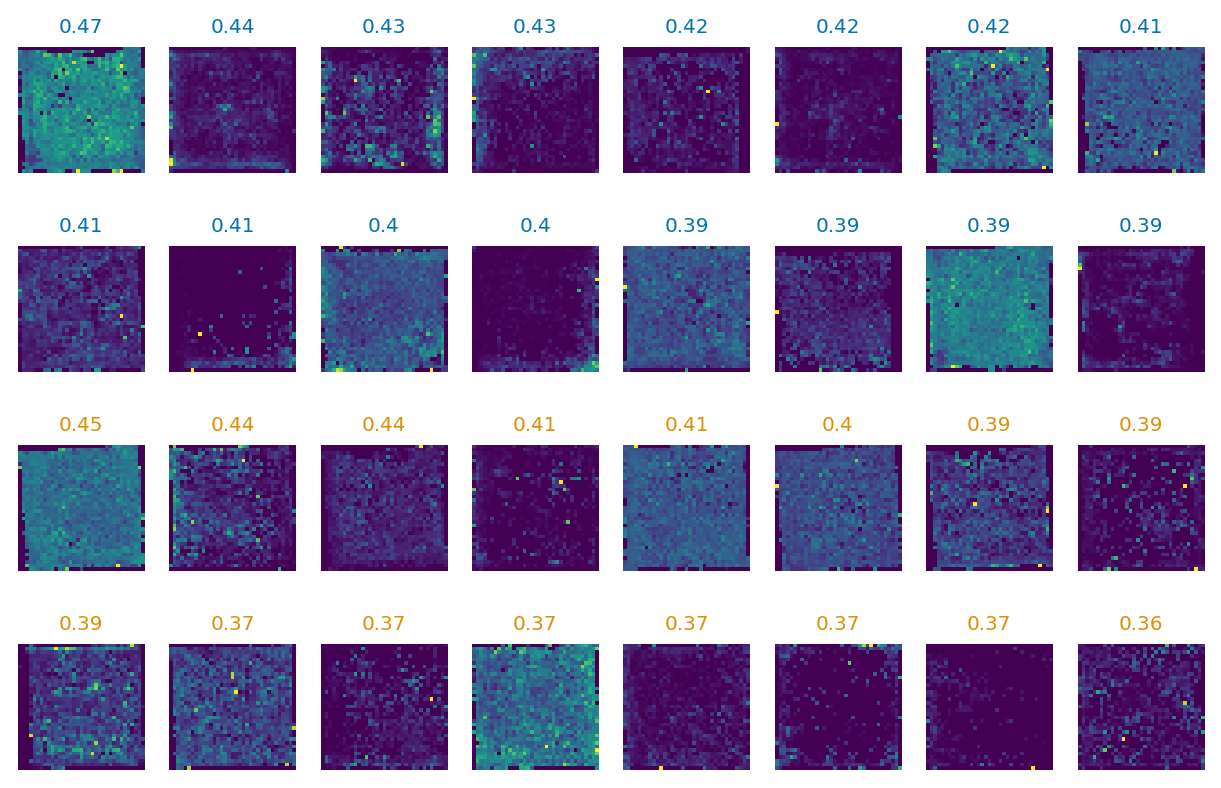

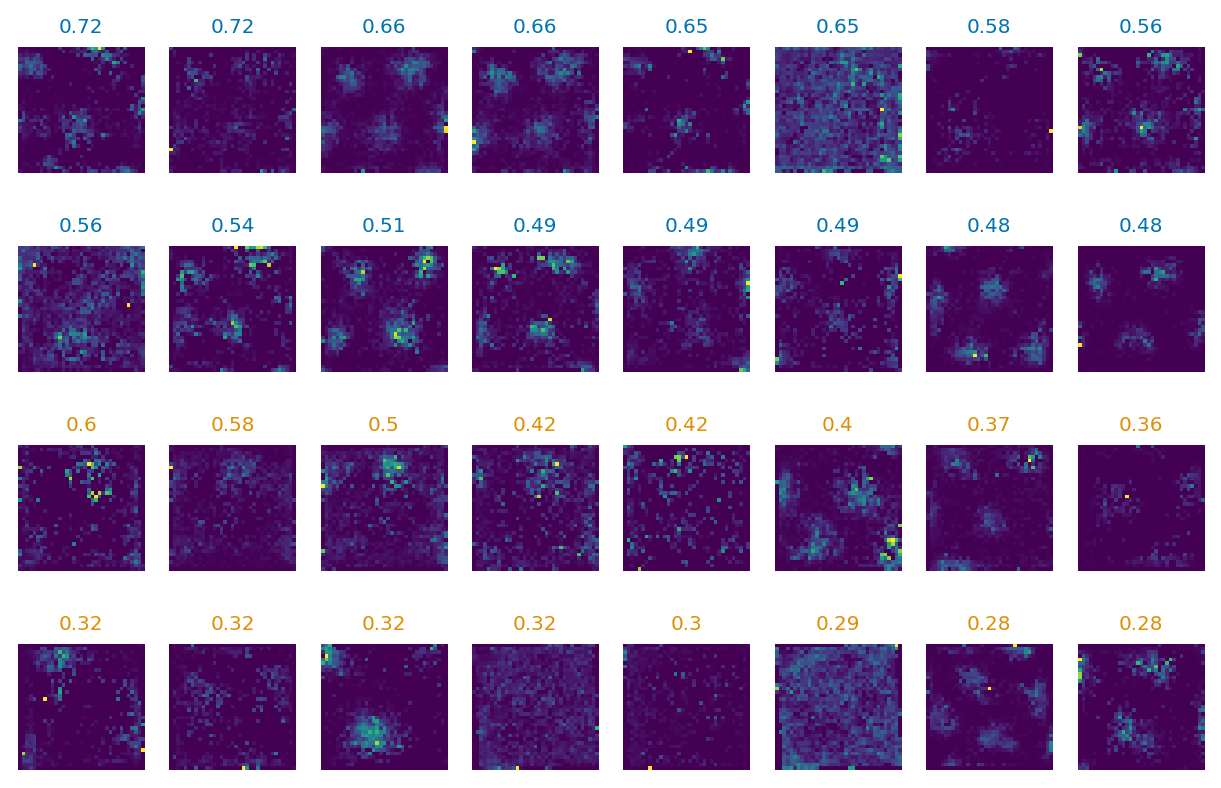

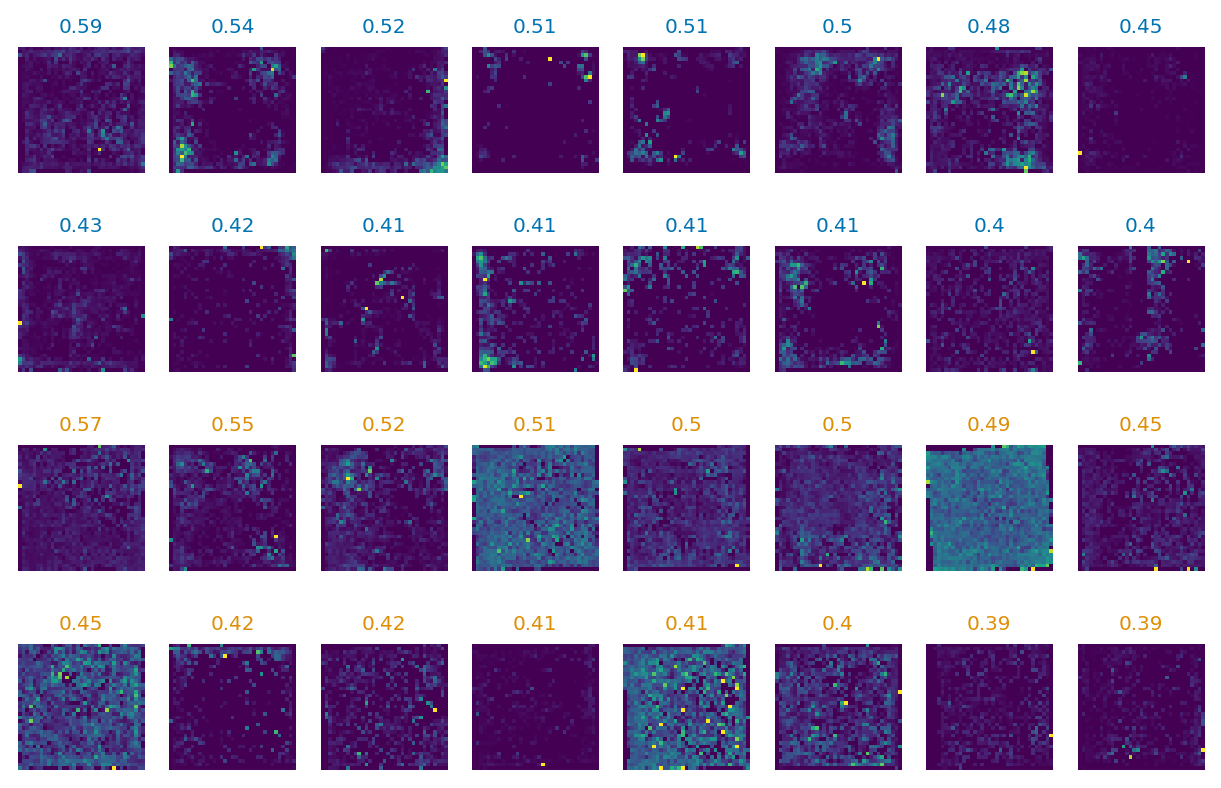

In [4]:
#clist = sns.color_palette('colorblind')
score_dict = {'speccorr':speccorr,'fpspeccorr':fpspeccorr,'speccorr_new':speccorr_new,'fpspeccorr_new':fpspeccorr_new,'fpautocorr':fpautocorr}
for score_lab, score in score_dict.items():
    angles = [6,4] if score_lab.startswith('fp') else [60,90]
    for angle in angles:
        fig, axs = plt.subplots(4,8, figsize=(8.5,5.5), dpi=180)
        for row, gtype in enumerate(['wta','j20a']):
            nids = np.argsort(score[gtype][:,angle])[::-1]
            print(nids[:8])
            for col, nid in enumerate(nids[:16]):
                ax = axs[2*row+col//8,col%8]
                ax.imshow(rmaps[gtype][nid])
                ax.axis('off')
                ax.set_title(f'{score[gtype][nid][angle]:.2g}',fontsize=8,color=clist[row])
                sns.despine(ax=ax,left=True,bottom=True)
        fig.savefig(f'images/presentation/examples/{score_lab}/{run_ID}_{angle}.png', bbox_inches='tight')